In [2]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.0 MB/s eta 0:00:00


In [10]:
import os
from pathlib import Path
import numpy as np
from PIL import Image
import imagehash
from collections import defaultdict
import pandas as pd

def check_duplicate_images(paths):
    """
    Check for duplicate images across train, valid, and test folders
    using both filename and image content comparison.

    Args:
        paths (dict): Dictionary containing paths to train, valid, and test folders

    Returns:
        tuple: (filename_duplicates, content_duplicates)
            - filename_duplicates: Dictionary of duplicate filenames
            - content_duplicates: Dictionary of duplicate images based on content
    """
    # Store all filenames
    filename_map = defaultdict(list)
    # Store image hashes
    hash_map = defaultdict(list)

    # Process each split (train/valid/test)
    for split in ['train', 'valid', 'test']:
        if os.path.exists(paths[split]):
            # Walk through all subdirectories
            for class_name in os.listdir(paths[split]):
                class_dir = os.path.join(paths[split], class_name)
                if os.path.isdir(class_dir):
                    # Process each image
                    for img_name in os.listdir(class_dir):
                        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                            # Store full path and split info for filename check
                            filename_map[img_name].append({
                                'path': os.path.join(class_dir, img_name),
                                'split': split,
                                'class': class_name
                            })

                            # Calculate image hash for content comparison
                            try:
                                img_path = os.path.join(class_dir, img_name)
                                with Image.open(img_path) as img:
                                    # Convert to RGB if necessary
                                    if img.mode != 'RGB':
                                        img = img.convert('RGB')
                                    # Calculate perceptual hash
                                    img_hash = str(imagehash.average_hash(img))
                                    hash_map[img_hash].append({
                                        'path': img_path,
                                        'split': split,
                                        'class': class_name,
                                        'filename': img_name
                                    })
                            except Exception as e:
                                print(f"Error processing {img_path}: {str(e)}")

    # Find duplicates by filename
    filename_duplicates = {
        filename: locations
        for filename, locations in filename_map.items()
        if len(locations) > 1
    }

    # Find duplicates by content
    content_duplicates = {
        hash_val: locations
        for hash_val, locations in hash_map.items()
        if len(locations) > 1
    }

    return filename_duplicates, content_duplicates

def print_duplicate_summary(filename_duplicates, content_duplicates):
    """Print a summary of found duplicates"""
    print("\n=== Duplicate Analysis Summary ===")

    print("\nDuplicates by filename:")
    if filename_duplicates:
        for filename, locations in filename_duplicates.items():
            print(f"\nFilename: {filename}")
            for loc in locations:
                print(f"- Found in {loc['split']}/{loc['class']}")
    else:
        print("No duplicate filenames found.")

    print("\nDuplicates by content:")
    if content_duplicates:
        for hash_val, locations in content_duplicates.items():
            print(f"\nHash: {hash_val}")
            for loc in locations:
                print(f"- {loc['filename']} in {loc['split']}/{loc['class']}")
    else:
        print("No duplicate content found.")

def generate_duplicate_report(filename_duplicates, content_duplicates):
    """Generate pandas DataFrames for detailed duplicate analysis"""
    # Prepare data for filename duplicates
    filename_data = []
    for filename, locations in filename_duplicates.items():
        for loc in locations:
            filename_data.append({
                'filename': filename,
                'split': loc['split'],
                'class': loc['class'],
                'full_path': loc['path']
            })

    # Prepare data for content duplicates
    content_data = []
    for hash_val, locations in content_duplicates.items():
        for loc in locations:
            content_data.append({
                'hash': hash_val,
                'filename': loc['filename'],
                'split': loc['split'],
                'class': loc['class'],
                'full_path': loc['path']
            })

    # Create DataFrames
    filename_df = pd.DataFrame(filename_data) if filename_data else pd.DataFrame()
    content_df = pd.DataFrame(content_data) if content_data else pd.DataFrame()

    return filename_df, content_df

def main():
    # Define base directory and paths
    base_dir = Path('/content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted_One')
    paths = {
        'base': base_dir,
        'valid': os.path.join(str(base_dir), 'valid'),
        'train': os.path.join(str(base_dir), 'train'),
        'test': os.path.join(str(base_dir), 'test')
    }

    # Check for duplicates
    print("Checking for duplicate images...")
    filename_duplicates, content_duplicates = check_duplicate_images(paths)

    # Print summary
    print_duplicate_summary(filename_duplicates, content_duplicates)

    # Generate detailed report
    filename_df, content_df = generate_duplicate_report(filename_duplicates, content_duplicates)

    # Save reports if duplicates were found
    if not filename_df.empty:
        filename_df.to_csv('duplicate_filenames_report.csv', index=False)
        print("\nDuplicate filenames report saved to 'duplicate_filenames_report.csv'")

    if not content_df.empty:
        content_df.to_csv('duplicate_content_report.csv', index=False)
        print("\nDuplicate content report saved to 'duplicate_content_report.csv'")

    return filename_df, content_df

if __name__ == "__main__":
    filename_df, content_df = main()


Checking for duplicate images...

=== Duplicate Analysis Summary ===

Duplicates by filename:
No duplicate filenames found.

Duplicates by content:

Hash: 7820001078fcf8f8
- OverRipe_reject_(110).jpg in train/OverRipe
- OverRipe_reject_(106)_dup1b.jpg in train/OverRipe
- OverRipe_reject_(127)_dup2b.jpg in train/OverRipe
- OverRipe_reject_(121)_dup3b.jpg in train/OverRipe
- OverRipe_reject_(115)_dup4b.jpg in train/OverRipe
- OverRipe_reject_(124)_dup5b.jpg in train/OverRipe
- OverRipe_reject_(118)_dup6b.jpg in train/OverRipe
- OverRipe_reject_(123)_dup7b.jpg in train/OverRipe
- OverRipe_reject_(722)_dup8b.jpg in train/OverRipe
- OverRipe_reject_(66)_dup9b.jpg in train/OverRipe
- OverRipe_reject_(656)_dup10b.jpg in train/OverRipe
- OverRipe_reject_(655)_dup11b.jpg in train/OverRipe
- OverRipe_reject_(65)_dup12b.jpg in train/OverRipe
- OverRipe_reject_(87)_dup13b.jpg in train/OverRipe
- OverRipe_reject_(689)_dup14b.jpg in train/OverRipe
- OverRipe_reject_(67)_dup15b.jpg in train/OverRipe


In [12]:
import os
from pathlib import Path
import numpy as np
from PIL import Image
import imagehash
from collections import defaultdict
import pandas as pd
import shutil

def check_and_rename_duplicate_images(paths, rename=True):
    """
    Check for duplicate images across train, valid, and test folders
    using both filename and image content comparison, and rename duplicates if specified.

    Args:
        paths (dict): Dictionary containing paths to train, valid, and test folders
        rename (bool): Whether to rename duplicate images or just report them

    Returns:
        tuple: (filename_duplicates, content_duplicates, renamed_images)
            - filename_duplicates: Dictionary of duplicate filenames
            - content_duplicates: Dictionary of duplicate images based on content
            - renamed_images: List of images that were renamed
    """
    # Store all filenames
    filename_map = defaultdict(list)
    # Store image hashes
    hash_map = defaultdict(list)
    # Track renamed images
    renamed_images = []

    # Process each split (train/valid/test)
    for split in ['train', 'valid', 'test']:
        if os.path.exists(paths[split]):
            # Walk through all subdirectories
            for class_name in os.listdir(paths[split]):
                class_dir = os.path.join(paths[split], class_name)
                if os.path.isdir(class_dir):
                    # Process each image
                    for img_name in os.listdir(class_dir):
                        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                            # Store full path and split info for filename check
                            filename_map[img_name].append({
                                'path': os.path.join(class_dir, img_name),
                                'split': split,
                                'class': class_name
                            })

                            # Calculate image hash for content comparison
                            try:
                                img_path = os.path.join(class_dir, img_name)
                                with Image.open(img_path) as img:
                                    # Convert to RGB if necessary
                                    if img.mode != 'RGB':
                                        img = img.convert('RGB')
                                    # Calculate perceptual hash
                                    img_hash = str(imagehash.average_hash(img))
                                    hash_map[img_hash].append({
                                        'path': img_path,
                                        'split': split,
                                        'class': class_name,
                                        'filename': img_name
                                    })
                            except Exception as e:
                                print(f"Error processing {img_path}: {str(e)}")

    # Find duplicates by filename
    filename_duplicates = {
        filename: locations
        for filename, locations in filename_map.items()
        if len(locations) > 1
    }

    # Find duplicates by content
    content_duplicates = {
        hash_val: locations
        for hash_val, locations in hash_map.items()
        if len(locations) > 1
    }

    # Rename duplicates if requested
    if rename:
        # Rename filename duplicates
        for filename, locations in filename_duplicates.items():
            for i, loc in enumerate(locations[1:], 1):  # Skip the first one (original)
                old_path = loc['path']
                file_base, file_ext = os.path.splitext(filename)
                new_filename = f"{file_base}_aca{i}a{file_ext}"
                new_path = os.path.join(os.path.dirname(old_path), new_filename)

                # Rename file
                try:
                    shutil.move(old_path, new_path)
                    renamed_images.append({
                        'original_path': old_path,
                        'new_path': new_path,
                        'original_name': filename,
                        'new_name': new_filename,
                        'duplicate_type': 'filename'
                    })
                    print(f"Renamed: {old_path} -> {new_path}")
                except Exception as e:
                    print(f"Error renaming {old_path}: {str(e)}")

        # Rename content duplicates (that aren't already filename duplicates)
        processed_paths = set([item['original_path'] for item in renamed_images])

        for hash_val, locations in content_duplicates.items():
            for i, loc in enumerate(locations[1:], 1):  # Skip the first one (original)
                old_path = loc['path']
                # Skip if already renamed
                if old_path in processed_paths:
                    continue

                file_base, file_ext = os.path.splitext(loc['filename'])
                new_filename = f"{file_base}_dup{i}b{file_ext}"
                new_path = os.path.join(os.path.dirname(old_path), new_filename)

                # Rename file
                try:
                    shutil.move(old_path, new_path)
                    renamed_images.append({
                        'original_path': old_path,
                        'new_path': new_path,
                        'original_name': loc['filename'],
                        'new_name': new_filename,
                        'duplicate_type': 'content'
                    })
                    print(f"Renamed: {old_path} -> {new_path}")
                    processed_paths.add(old_path)
                except Exception as e:
                    print(f"Error renaming {old_path}: {str(e)}")

    return filename_duplicates, content_duplicates, renamed_images

def print_duplicate_summary(filename_duplicates, content_duplicates, renamed_images=None):
    """Print a summary of found duplicates and renamed images"""
    print("\n=== Duplicate Analysis Summary ===")

    print("\nDuplicates by filename:")
    if filename_duplicates:
        for filename, locations in filename_duplicates.items():
            print(f"\nFilename: {filename}")
            for loc in locations:
                print(f"- Found in {loc['split']}/{loc['class']}")
    else:
        print("No duplicate filenames found.")

    print("\nDuplicates by content:")
    if content_duplicates:
        for hash_val, locations in content_duplicates.items():
            print(f"\nHash: {hash_val}")
            for loc in locations:
                print(f"- {loc['filename']} in {loc['split']}/{loc['class']}")
    else:
        print("No duplicate content found.")

    if renamed_images:
        print("\nRenamed Images:")
        print(f"Total renamed: {len(renamed_images)}")
        for item in renamed_images[:5]:  # Show first 5 as example
            print(f"- {item['original_name']} -> {item['new_name']} ({item['duplicate_type']} duplicate)")
        if len(renamed_images) > 5:
            print(f"... and {len(renamed_images) - 5} more")

def generate_duplicate_report(filename_duplicates, content_duplicates, renamed_images=None):
    """Generate pandas DataFrames for detailed duplicate analysis"""
    # Prepare data for filename duplicates
    filename_data = []
    for filename, locations in filename_duplicates.items():
        for loc in locations:
            filename_data.append({
                'filename': filename,
                'split': loc['split'],
                'class': loc['class'],
                'full_path': loc['path']
            })

    # Prepare data for content duplicates
    content_data = []
    for hash_val, locations in content_duplicates.items():
        for loc in locations:
            content_data.append({
                'hash': hash_val,
                'filename': loc['filename'],
                'split': loc['split'],
                'class': loc['class'],
                'full_path': loc['path']
            })

    # Create DataFrames
    filename_df = pd.DataFrame(filename_data) if filename_data else pd.DataFrame()
    content_df = pd.DataFrame(content_data) if content_data else pd.DataFrame()
    renamed_df = pd.DataFrame(renamed_images) if renamed_images else pd.DataFrame()

    return filename_df, content_df, renamed_df

def main(rename_duplicates=True):
    # Define base directory and paths
    base_dir = Path('/content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted')
    paths = {
        'base': base_dir,
        'valid': os.path.join(str(base_dir), 'valid'),
        'train': os.path.join(str(base_dir), 'train'),
        'test': os.path.join(str(base_dir), 'test')
    }

    # Check for duplicates and rename if requested
    print(f"Checking for duplicate images{' and renaming them' if rename_duplicates else ''}...")
    filename_duplicates, content_duplicates, renamed_images = check_and_rename_duplicate_images(
        paths, rename=rename_duplicates
    )

    # Print summary
    print_duplicate_summary(filename_duplicates, content_duplicates, renamed_images)

    # Generate detailed report
    filename_df, content_df, renamed_df = generate_duplicate_report(
        filename_duplicates, content_duplicates, renamed_images
    )

    # Save reports if duplicates were found
    if not filename_df.empty:
        filename_df.to_csv('duplicate_filenames_report.csv', index=False)
        print("\nDuplicate filenames report saved to 'duplicate_filenames_report.csv'")

    if not content_df.empty:
        content_df.to_csv('duplicate_content_report.csv', index=False)
        print("\nDuplicate content report saved to 'duplicate_content_report.csv'")

    if not renamed_df.empty:
        renamed_df.to_csv('renamed_images_report.csv', index=False)
        print("\nRenamed images report saved to 'renamed_images_report.csv'")

    return filename_df, content_df, renamed_df

if __name__ == "__main__":
    # Set rename_duplicates=False if you only want to detect without renaming
    filename_df, content_df, renamed_df = main(rename_duplicates=True)


Streaming output truncated to the last 5000 lines.
Renamed: /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_r_10_100_dup1b.jpg -> /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_r_10_100_dup1b_dup1b.jpg
Renamed: /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_39_100 (2)_dup1b.jpg -> /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_39_100 (2)_dup1b_dup1b.jpg
Renamed: /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_39_100 (1)_dup2b.jpg -> /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_39_100 (1)_dup2b_dup2b.jpg
Renamed: /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_53_100 (1)_dup3b.jpg -> /content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted/train/Ripe/Ripe_53_100 (1)_dup3b_dup

Mounted at /content/drive
Drive mounted successfully

Verifying folder structure...
Found test directory
  ├── Found OverRipe category
  ├── Found Ripe category
  ├── Found Unripe category
  ├── Found VeryRipe category
Found train directory
  ├── Found OverRipe category
  ├── Found Ripe category
  ├── Found Unripe category
  ├── Found VeryRipe category
Found valid directory
  ├── Found OverRipe category
  ├── Found Ripe category
  ├── Found Unripe category
  ├── Found VeryRipe category

Checking and renaming mismatched images...

Total files renamed: 0

Counting images in dataset...

=== Tomato Ripeness Dataset Summary ===

Total images in dataset: 5203

Images by split:
test: 263 images (5.1%)
train: 4058 images (78.0%)
valid: 882 images (17.0%)

Images by category:
OverRipe: 1292 images (24.8%)
Ripe: 1302 images (25.0%)
Unripe: 1302 images (25.0%)
VeryRipe: 1307 images (25.1%)

Detailed breakdown by split and category:
Split     test  train  valid
Category                    
OverRip

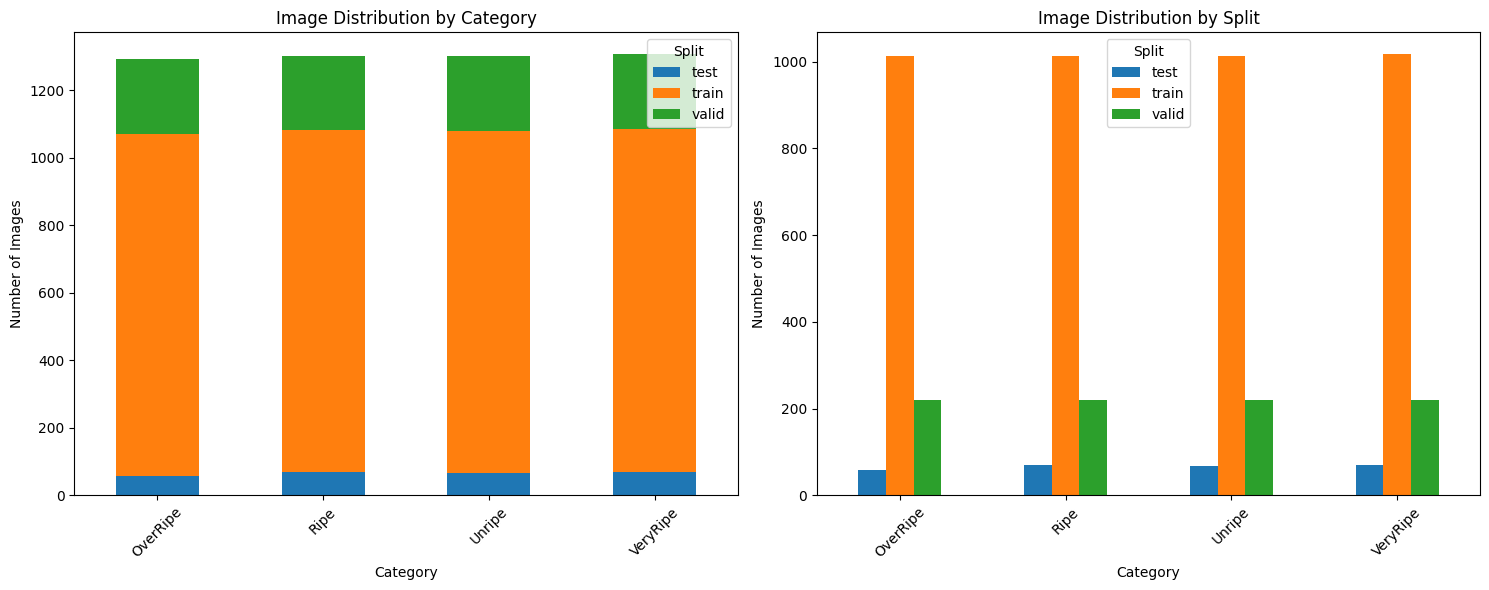

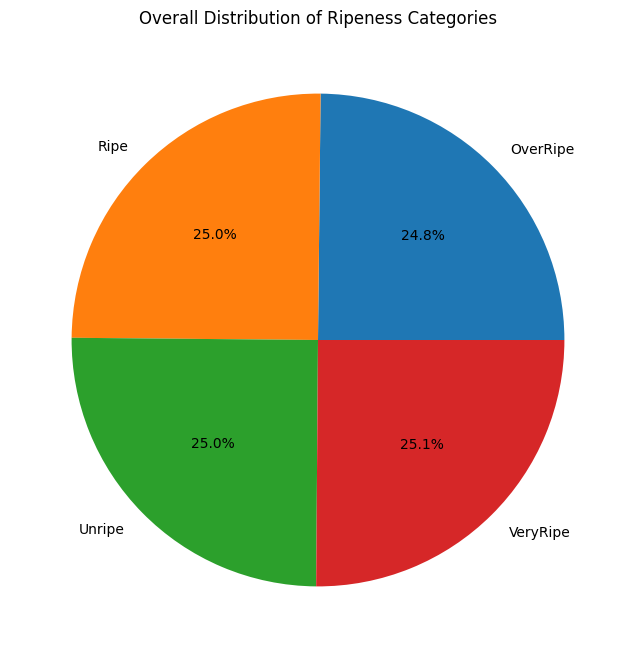


Detailed distribution saved to 'tomato_dataset_distribution.csv'


In [13]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

def mount_drive():
    """Mount Google Drive"""
    try:
        drive.mount('/content/drive', force_remount=True)
        print("Drive mounted successfully")
    except Exception as e:
        print(f"Error mounting drive: {str(e)}")
        return False
    return True

def rename_mismatched_images(base_path):
    """
    Rename images where the prefix doesn't match the folder name
    """
    categories = ['OverRipe', 'Ripe', 'Unripe', 'VeryRipe']
    splits = ['test', 'train', 'valid']
    renamed_count = 0

    for split in splits:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            continue

        for category in categories:
            category_path = os.path.join(split_path, category)
            if not os.path.exists(category_path):
                continue

            # Get all image files
            image_files = [f for f in os.listdir(category_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            for image_file in image_files:
                # Check if image filename starts with a different category name
                for other_category in categories:
                    if image_file.startswith(other_category + '_') and other_category != category:
                        # Create new filename with correct category prefix
                        new_name = category + '_' + image_file[len(other_category + '_'):]
                        old_path = os.path.join(category_path, image_file)
                        new_path = os.path.join(category_path, new_name)

                        try:
                            os.rename(old_path, new_path)
                            print(f"Renamed: {image_file} -> {new_name}")
                            renamed_count += 1
                        except Exception as e:
                            print(f"Error renaming {image_file}: {str(e)}")

    print(f"\nTotal files renamed: {renamed_count}")
    return renamed_count

def verify_folder_structure(base_path):
    """
    Verify the folder structure exists and is correct
    """
    required_splits = ['test', 'train', 'valid']
    required_categories = ['OverRipe', 'Ripe', 'Unripe', 'VeryRipe']

    if not os.path.exists(base_path):
        print(f"Error: Base directory not found at {base_path}")
        return False

    structure_valid = False
    for split in required_splits:
        split_path = os.path.join(base_path, split)
        if os.path.exists(split_path):
            structure_valid = True
            print(f"Found {split} directory")
            for category in required_categories:
                category_path = os.path.join(split_path, category)
                if os.path.exists(category_path):
                    print(f"  ├── Found {category} category")
                else:
                    print(f"  ├── Missing {category} category")
        else:
            print(f"Missing {split} directory")

    return structure_valid

def count_tomato_images(base_path):
    """
    Count images in each ripeness category across train, valid, and test folders.
    """
    categories = ['OverRipe', 'Ripe', 'Unripe', 'VeryRipe']
    splits = ['test', 'train', 'valid']
    counts_data = []

    for split in splits:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            print(f"Warning: {split} folder not found at {split_path}")
            continue

        for category in categories:
            category_path = os.path.join(split_path, category)
            if os.path.exists(category_path):
                image_count = len([f for f in os.listdir(category_path)
                                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

                counts_data.append({
                    'Split': split,
                    'Category': category,
                    'Count': image_count
                })
            else:
                print(f"Warning: {category} folder not found in {split}")
                counts_data.append({
                    'Split': split,
                    'Category': category,
                    'Count': 0
                })

    return pd.DataFrame(counts_data)

def print_summary(df):
    """Print a detailed summary of the image counts"""
    if df.empty or df['Count'].sum() == 0:
        print("No images found in the dataset.")
        return

    print("\n=== Tomato Ripeness Dataset Summary ===\n")
    total_images = df['Count'].sum()
    print(f"Total images in dataset: {total_images}")

    print("\nImages by split:")
    split_summary = df.groupby('Split')['Count'].sum()
    for split, count in split_summary.items():
        if count > 0:
            print(f"{split}: {count} images ({count/total_images*100:.1f}%)")

    print("\nImages by category:")
    category_summary = df.groupby('Category')['Count'].sum()
    for category, count in category_summary.items():
        if count > 0:
            print(f"{category}: {count} images ({count/total_images*100:.1f}%)")

    print("\nDetailed breakdown by split and category:")
    pivot_table = df.pivot(index='Category', columns='Split', values='Count').fillna(0)
    print(pivot_table)

def plot_distribution(df):
    """Create visualizations of the dataset distribution"""
    if df.empty or df['Count'].sum() == 0:
        print("No data to visualize.")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    df_pivot = df.pivot(index='Category', columns='Split', values='Count').fillna(0)
    df_pivot.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title('Image Distribution by Category')
    ax1.set_xlabel('Category')
    ax1.set_ylabel('Number of Images')
    ax1.legend(title='Split')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    df_pivot.plot(kind='bar', ax=ax2)
    ax2.set_title('Image Distribution by Split')
    ax2.set_xlabel('Category')
    ax2.set_ylabel('Number of Images')
    ax2.legend(title='Split')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 8))
    category_totals = df.groupby('Category')['Count'].sum()
    if category_totals.sum() > 0:
        plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%')
        plt.title('Overall Distribution of Ripeness Categories')
        plt.show()

def main():
    # Mount Google Drive
    if not mount_drive():
        return None

    # Define base directory
    base_dir = Path('/content/drive/MyDrive/SeniorProject/Tomato/RipenessClassification_Sorted')

    # Verify folder structure
    print("\nVerifying folder structure...")
    if not verify_folder_structure(str(base_dir)):
        print("\nError: Invalid folder structure. Please check your paths and folder organization.")
        return None

    # Rename mismatched images
    print("\nChecking and renaming mismatched images...")
    renamed_count = rename_mismatched_images(str(base_dir))
    if renamed_count > 0:
        print(f"Successfully renamed {renamed_count} images")

    # Get counts
    print("\nCounting images in dataset...")
    counts_df = count_tomato_images(str(base_dir))

    if counts_df.empty or counts_df['Count'].sum() == 0:
        print("No images found in the dataset. Please check your folder structure and paths.")
        return None

    # Print summary
    print_summary(counts_df)

    # Plot distribution
    plot_distribution(counts_df)

    # Save detailed report
    try:
        counts_df.to_csv('tomato_dataset_distribution.csv', index=False)
        print("\nDetailed distribution saved to 'tomato_dataset_distribution.csv'")
    except Exception as e:
        print(f"\nError saving CSV file: {str(e)}")

    return counts_df

if __name__ == "__main__":
    counts_df = main()